In [ ]:
#Importing required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#reading the dataset
df=pd.read_csv('94_character_TMNIST.csv')
df.describe()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Number of classes are 94


In [ ]:
no_of_fonts=df['names'].nunique()
print('Number of different fonts are',no_of_fonts)

Number of different fonts are 2977


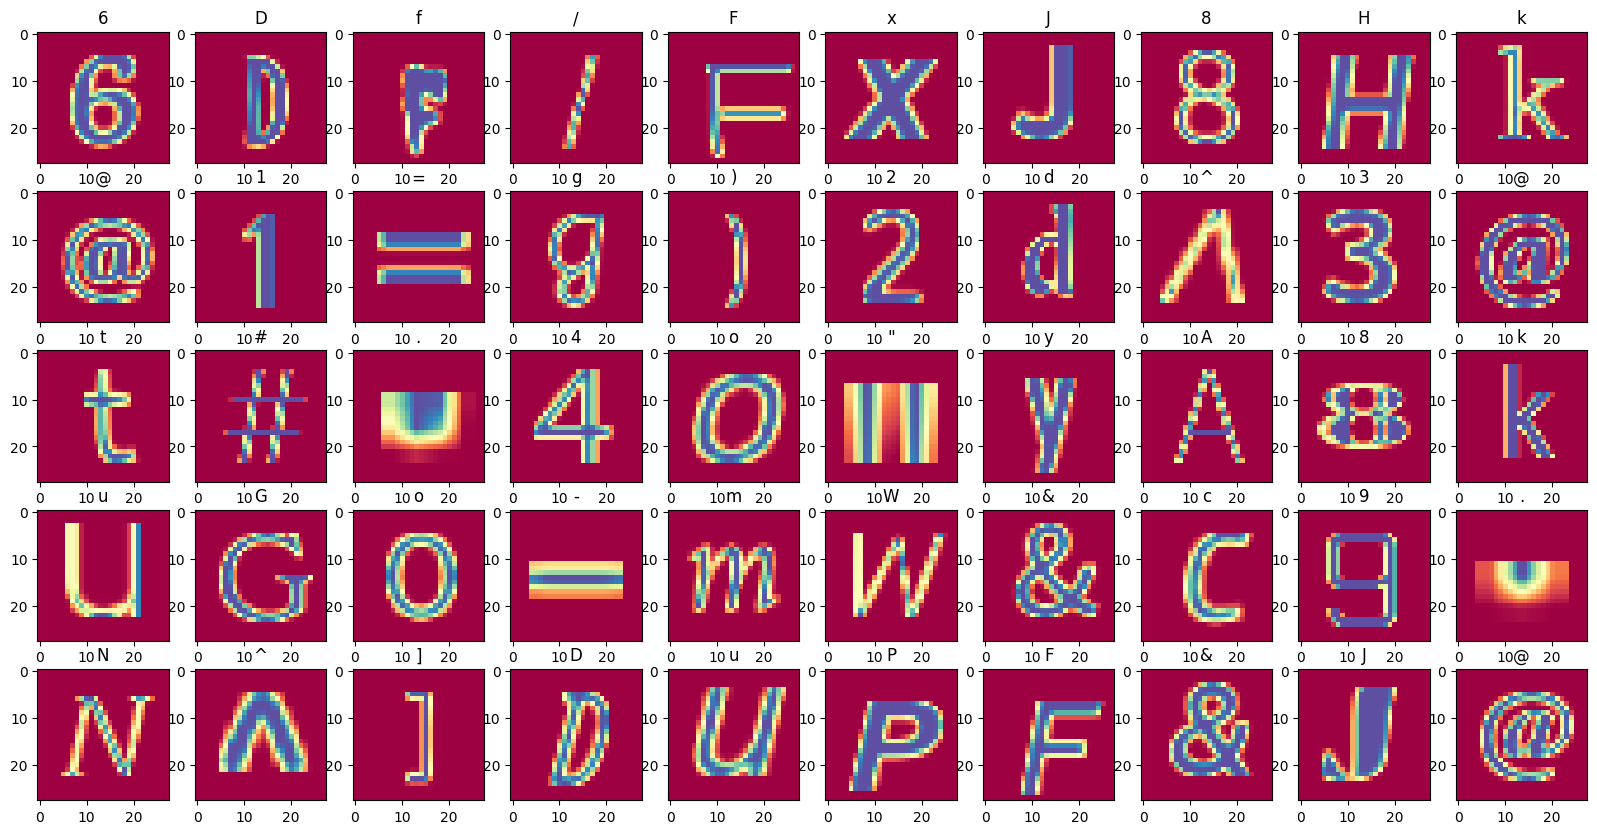

In [ ]:
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
# Encoding the Target Label
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1,1))
y_test =  enc.transform(y_test.values.reshape(-1,1))

In [ ]:
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (14436, 28, 28, 1)
14436 train samples
4812 test samples


In [ ]:
batch_size = 128
img_rows, img_cols = 28, 28         # input image dimensions
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.01               # drop probability for dropout @ conv layer
prob_drop_hidden = 0.01

In [ ]:
# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(64, (5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Convolution2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))
model.add(Flatten())

# fc1 layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 32)         

In [ ]:
# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/20
113/113 [==============================] - 32s 265ms/step - loss: nan - accuracy: 0.3446 - val_loss: nan - val_accuracy: 0.0112
Epoch 2/20
113/113 [==============================] - 28s 245ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 3/20
113/113 [==============================] - 32s 287ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 4/20
113/113 [==============================] - 34s 297ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 5/20
113/113 [==============================] - 30s 265ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 6/20
113/113 [==============================] - 28s 252ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 7/20
113/113 [==============================] - 28s 245ms/step - loss: nan - accuracy: 0.0112 - val_loss: nan - val_accuracy: 0.0112
Epoch 8/20
113/113 [=======

In [ ]:
evaluation = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

38/38 [==============================] - 2s 49ms/step - loss: nan - accuracy: 0.0112
Summary: Loss over the test dataset: nan, Accuracy: 0.0112
